In [4]:
#Importing the required libraries
import numpy as np

In [5]:
#Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2

In [6]:
def softmax(a):
    e_pa = np.exp(a) # Vector
    ans = e_pa/np.sum(e_pa,axis = 1,keepdims=True)
    return ans

In [7]:
# Testing the softmax function
print(softmax(np.array([[2,3,4],[3,4,5],[6,7,8]])))

[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


In [8]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} # Dictionary for storing parameters
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = np.dot(delta3,W3.T) * (1 - np.square(a2))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = np.dot(delta2,W2.T) * (1 - np.square(a1))
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model["W2"] -= learning_rate*dw2
        self.model["W3"] -= learning_rate*dw3
        
        self.model["b1"] -= learning_rate*db1
        self.model["b2"] -= learning_rate*db2
        self.model["b3"] -= learning_rate*db3
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        a1,a2,y_ = self.activation_outputs
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)
        
        

In [9]:
def loss(y_ohot,p):
    l = -np.mean(y_ohot*np.log(p))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    y_ohot = np.zeros((m,depth))
    y_ohot[np.arange(m),y] = 1
    return y_ohot

In [10]:
# Generating the data
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [11]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [13]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


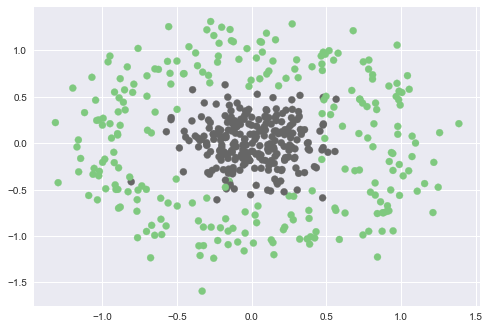

In [14]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training Our Model

In [15]:
model = NeuralNetwork(input_size = 2,layers = [10,5], output_size = 2)

In [16]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHOT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHOT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHOT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix+1,l))
        
    return training_loss

In [37]:
losses = train(X,Y,model,500,0.001)

Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Epoch 48 Loss 0.0725
E

Epoch 423 Loss 0.0403
Epoch 424 Loss 0.0402
Epoch 425 Loss 0.0402
Epoch 426 Loss 0.0402
Epoch 427 Loss 0.0402
Epoch 428 Loss 0.0402
Epoch 429 Loss 0.0402
Epoch 430 Loss 0.0402
Epoch 431 Loss 0.0402
Epoch 432 Loss 0.0401
Epoch 433 Loss 0.0401
Epoch 434 Loss 0.0401
Epoch 435 Loss 0.0401
Epoch 436 Loss 0.0401
Epoch 437 Loss 0.0401
Epoch 438 Loss 0.0401
Epoch 439 Loss 0.0401
Epoch 440 Loss 0.0400
Epoch 441 Loss 0.0400
Epoch 442 Loss 0.0400
Epoch 443 Loss 0.0400
Epoch 444 Loss 0.0400
Epoch 445 Loss 0.0400
Epoch 446 Loss 0.0400
Epoch 447 Loss 0.0400
Epoch 448 Loss 0.0399
Epoch 449 Loss 0.0399
Epoch 450 Loss 0.0399
Epoch 451 Loss 0.0399
Epoch 452 Loss 0.0399
Epoch 453 Loss 0.0399
Epoch 454 Loss 0.0399
Epoch 455 Loss 0.0399
Epoch 456 Loss 0.0399
Epoch 457 Loss 0.0398
Epoch 458 Loss 0.0398
Epoch 459 Loss 0.0398
Epoch 460 Loss 0.0398
Epoch 461 Loss 0.0398
Epoch 462 Loss 0.0398
Epoch 463 Loss 0.0398
Epoch 464 Loss 0.0398
Epoch 465 Loss 0.0397
Epoch 466 Loss 0.0397
Epoch 467 Loss 0.0397
Epoch 468 

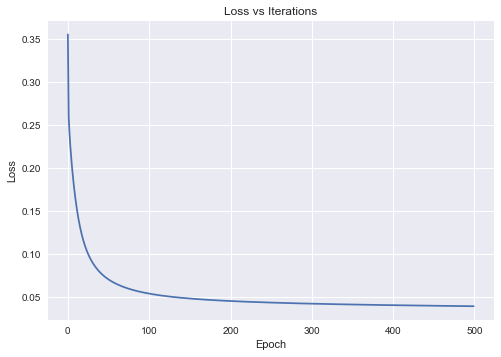

In [38]:
# Graph plotting the losses
plt.plot(losses)
plt.title("Loss vs Iterations")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Visualise the Decision Boundary

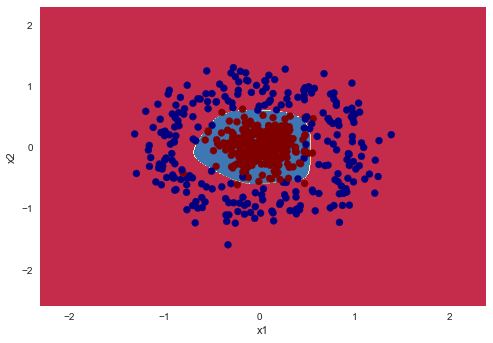

In [49]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [39]:
outputs = model.predict(X)

In [48]:
outputs.shape

(500,)

In [47]:
training_accuracy = np.sum(outputs == Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


# Testing on other non-linear Datasets

In [50]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [51]:
# XOR Dataset
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
             ])

Y = np.array([0,1,1,0])

In [57]:
losses = train(X,Y,model,300,0.5)

Epoch 1 Loss 0.0008
Epoch 2 Loss 0.0008
Epoch 3 Loss 0.0008
Epoch 4 Loss 0.0008
Epoch 5 Loss 0.0008
Epoch 6 Loss 0.0008
Epoch 7 Loss 0.0008
Epoch 8 Loss 0.0008
Epoch 9 Loss 0.0008
Epoch 10 Loss 0.0008
Epoch 11 Loss 0.0008
Epoch 12 Loss 0.0008
Epoch 13 Loss 0.0007
Epoch 14 Loss 0.0007
Epoch 15 Loss 0.0007
Epoch 16 Loss 0.0007
Epoch 17 Loss 0.0007
Epoch 18 Loss 0.0007
Epoch 19 Loss 0.0007
Epoch 20 Loss 0.0007
Epoch 21 Loss 0.0007
Epoch 22 Loss 0.0007
Epoch 23 Loss 0.0007
Epoch 24 Loss 0.0007
Epoch 25 Loss 0.0007
Epoch 26 Loss 0.0007
Epoch 27 Loss 0.0007
Epoch 28 Loss 0.0007
Epoch 29 Loss 0.0007
Epoch 30 Loss 0.0006
Epoch 31 Loss 0.0006
Epoch 32 Loss 0.0006
Epoch 33 Loss 0.0006
Epoch 34 Loss 0.0006
Epoch 35 Loss 0.0006
Epoch 36 Loss 0.0006
Epoch 37 Loss 0.0006
Epoch 38 Loss 0.0006
Epoch 39 Loss 0.0006
Epoch 40 Loss 0.0006
Epoch 41 Loss 0.0006
Epoch 42 Loss 0.0006
Epoch 43 Loss 0.0006
Epoch 44 Loss 0.0006
Epoch 45 Loss 0.0006
Epoch 46 Loss 0.0006
Epoch 47 Loss 0.0006
Epoch 48 Loss 0.0006
E

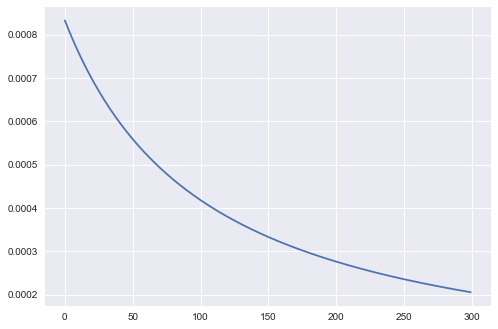

In [58]:
plt.plot(losses)

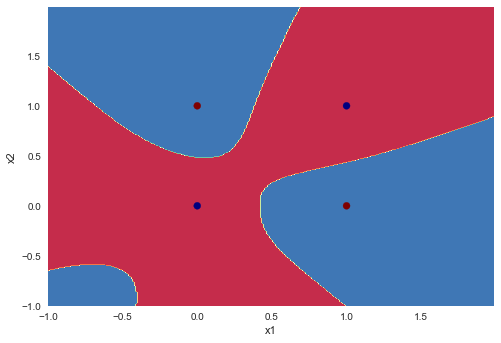

In [59]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

## Other Datasets

In [60]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [61]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Acc 1.0000


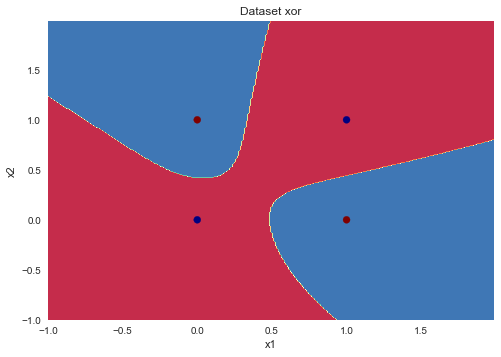

Training Acc 0.9600


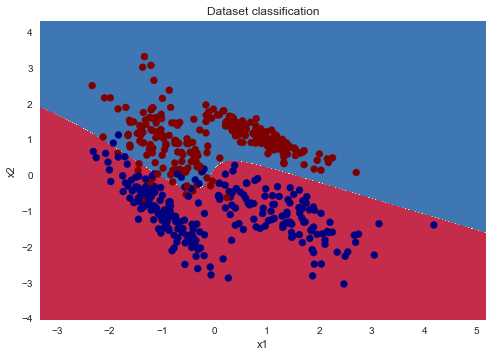

Training Acc 0.9740


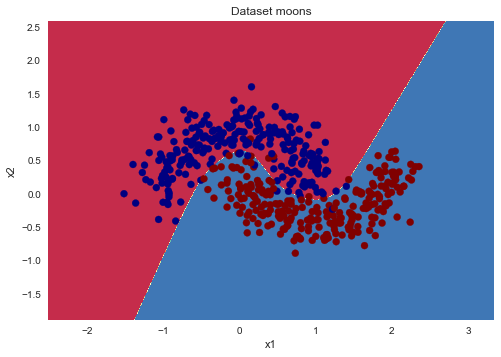

Training Acc 0.9640


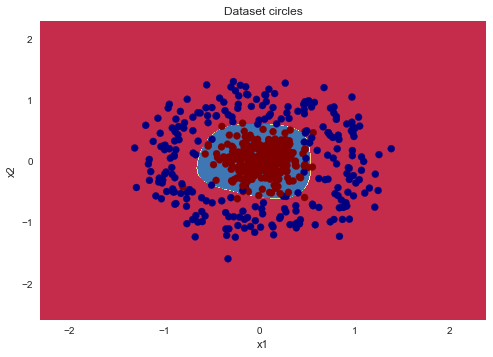

In [62]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()